In [2]:
import itertools
import networkx as nx
from networkx.generators.atlas import graph_atlas_g
from networkx.algorithms import isomorphism
from sympy.combinatorics.permutations import Permutation
from sympy.combinatorics.perm_groups import PermutationGroup
from math import factorial

def change_edge(g, e, ne):
    g1 = g.copy()
    g1.remove_edge(*e)
    g1.add_edge(*ne)
    return g1

def is_feasible_edge_replacement(g, e, ne):
    if nx.is_isomorphic(g, change_edge(g, e, ne)):
        GM = isomorphism.GraphMatcher(g, change_edge(g, e, ne))
        return list(GM.subgraph_isomorphisms_iter())
    else:
        return False

def dict_to_perm(d):
    """Change a dict d to a list the_list so that d[i] becomes the same as the_list[i]"""
    the_list = []
    for i in range(len(d)):
        the_list.append(d[i])
    return the_list

def perms_all_feasible_edge_replacements(graph):
    n = graph.order()
    perms = []
    edges = graph.edges()
    nonedges = itertools.combinations(graph.nodes(), 2)
    nonedges = [(x, y) for (x, y) in nonedges
                if not (x, y) in edges and not (y, x) in edges]
    for e in edges:
        for ne in nonedges+[e]:
            isos = is_feasible_edge_replacement(graph, e, ne)
            if isos:
                perms.extend([Permutation(dict_to_perm(x)) for x in isos])
    return PermutationGroup(perms)

def is_local_amoeba(graph):
    n = graph.order()
    return perms_all_feasible_edge_replacements(graph).order() == factorial(n)

def local_amoebas_given_order(n, connected=True):
    graphs = list_graphs(n, connected=connected)
    return [g for g in graphs if is_local_amoeba(g)]

True

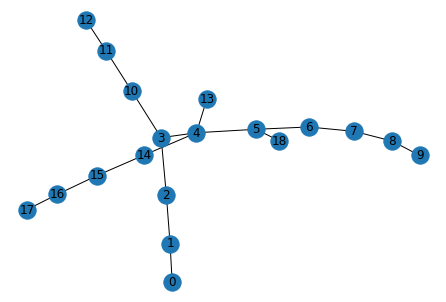

In [9]:
G = nx.path_graph(10)

aristas = [(3,10),(10,11),(11,12),(4,13),(4,14),(14,15),(15,16),(16,17),(5,18)]
G.add_edges_from(aristas)

nx.draw(G, with_labels=True)

is_local_amoeba(G)